In [1]:
from numpy import array
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle


from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.utils.class_weight import compute_class_weight
from joblib import parallel_backend
from joblib import Parallel, delayed

In [2]:
#import data

comb_dinuc_df= pd.read_csv('/shares/kslotkin_share/private/tratnayake/frNAnet/SR_UR/S20162204_dinuc_df.txt',header=0,sep='\t')

np.shape(comb_dinuc_df)
shuf_comb_dinuc_df=comb_dinuc_df.iloc[np.random.permutation(len(comb_dinuc_df))]
shuf_comb_dinuc_df=shuf_comb_dinuc_df.reset_index(drop=True)


In [3]:
ydt=shuf_comb_dinuc_df['ptype']
xdt=shuf_comb_dinuc_df.drop(['seq_id','ptype'],axis=1)


In [4]:
#split test train data
Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(xdt, ydt, test_size=0.2, random_state=256)
Xdt_train.shape, Xdt_test.shape


((1138150, 21), (284538, 21))

In [5]:

with parallel_backend('threading',n_jobs=48 ):


    #print('traing>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    # Calculate class weights
    class_weights = compute_class_weight('balanced', classes=np.unique(ydt_train), y=ydt_train)
    class_weights

    rfc_dicomb = RandomForestClassifier(random_state=3500,n_estimators = 200,class_weight=dict(enumerate(class_weights) ))


    #'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 100, 'criterion': 'log_loss', 'bootstrap': True

#    rfc_dicomb= RandomForestClassifier(
#        n_estimators=200,
#        criterion='log_loss',
#        max_depth=100,
#        min_samples_split=10,
#        min_samples_leaf=2,
#        max_features='log2',
#        bootstrap=True,
#        n_jobs=16,
#        random_state=0,
#        class_weight=dict(enumerate(class_weights))
#    )


    print('training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    #model train
    rfc_dicomb.fit(Xdt_train, ydt_train)


    # Predict the Test set results

    y_pred =  rfc_dicomb.predict(Xdt_test)



training >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [6]:
print('Model test accuracy : {0:0.4f}'. format(accuracy_score(ydt_test, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt_test,y_pred)))



Model test accuracy : 0.7093

Classification report :
               precision    recall  f1-score   support

           0       0.72      0.62      0.67    133856
           1       0.70      0.79      0.74    150682

    accuracy                           0.71    284538
   macro avg       0.71      0.70      0.70    284538
weighted avg       0.71      0.71      0.71    284538



In [ ]:
# #save model
mfilename='/shares/kslotkin_share/private/tratnayake/frNAnet/models/rfc_S16202204_SRUR_wg_v1.pkl'

pickle.dump( rfc_dicomb,open(mfilename,'wb'))


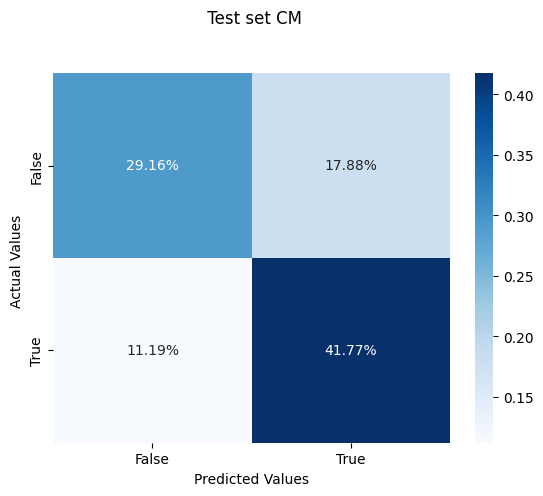

In [8]:
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt_test, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()

fig1.savefig("RFC_SR_UR_S16202204_testset_WG_v1_fullred_0417.pdf")